In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from collections import Counter



In [10]:
# Define paths
base_path = '../dataset/'
train_csv_path = os.path.join(base_path, 'Training_set.csv')
test_csv_path = os.path.join(base_path, 'Testing_set.csv')

# Load CSV files
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)

# Display basic info
print("Training Set Info:")
print(train_df.info())
print("\nTraining Set Head:")
print(train_df.head())

print("\nTesting Set Info:")
print(test_df.info())
print("\nTesting Set Head:")
print(test_df.head())

# Check for missing values
print("\nMissing Values in Training Set:")
print(train_df.isnull().sum())
print("\nMissing Values in Testing Set:")
print(test_df.isnull().sum())

Training Set Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  6499 non-null   object
 1   label     6499 non-null   object
dtypes: object(2)
memory usage: 101.7+ KB
None

Training Set Head:
      filename                     label
0  Image_1.jpg          SOUTHERN DOGFACE
1  Image_2.jpg                    ADONIS
2  Image_3.jpg            BROWN SIPROETA
3  Image_4.jpg                   MONARCH
4  Image_5.jpg  GREEN CELLED CATTLEHEART

Testing Set Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2786 entries, 0 to 2785
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  2786 non-null   object
dtypes: object(1)
memory usage: 21.9+ KB
None

Testing Set Head:
      filename
0  Image_1.jpg
1  Image_2.jpg
2  Image_3.jpg
3  Image_4.jpg
4  Image_5.jpg

Missing Values 

Number of unique species: 75

Label Counts:
label
MOURNING CLOAK    131
SLEEPY ORANGE     107
ATALA             100
BROWN SIPROETA     99
SCARCE SWALLOW     97
                 ... 
AMERICAN SNOOT     74
GOLD BANDED        73
MALACHITE          73
CRIMSON PATCH      72
WOOD SATYR         71
Name: count, Length: 75, dtype: int64


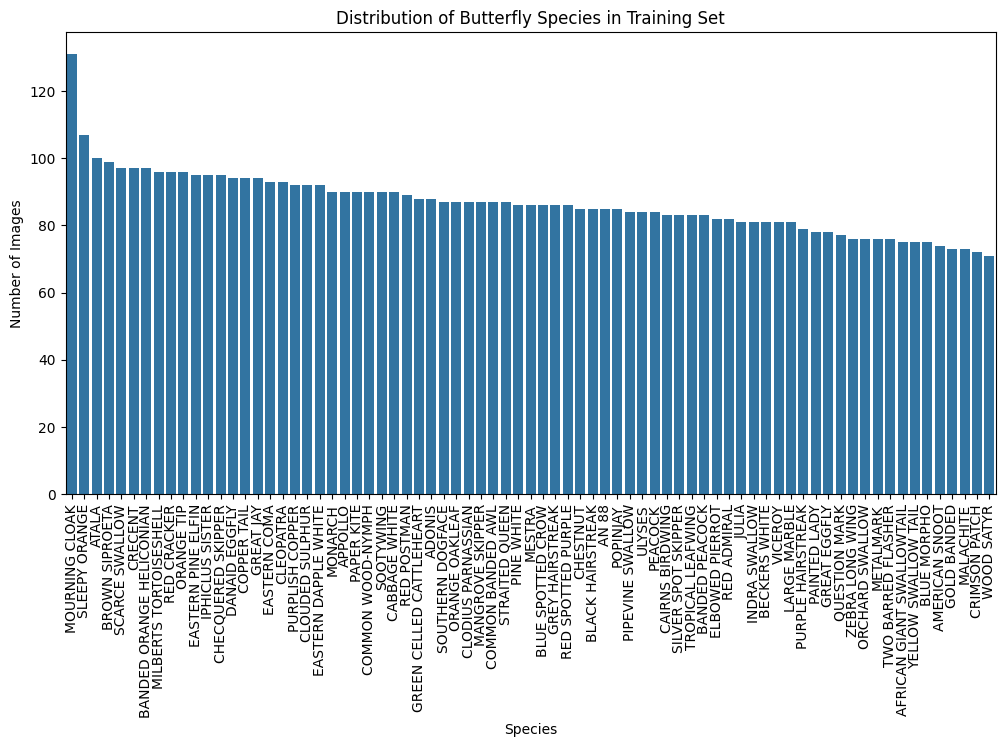

In [11]:
# Get unique labels and their counts
label_counts = train_df['label'].value_counts()

print(f"Number of unique species: {len(label_counts)}")
print("\nLabel Counts:")
print(label_counts)

# Plot label distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xticks(rotation=90)
plt.title('Distribution of Butterfly Species in Training Set')
plt.xlabel('Species')
plt.ylabel('Number of Images')
plt.show()

# Check test set (assuming it has labels; if not, skip this)
if 'label' in test_df.columns:
    test_label_counts = test_df['label'].value_counts()
    print(f"\nNumber of unique species in test set: {len(test_label_counts)}")
    print("\nTest Label Counts:")
    print(test_label_counts)

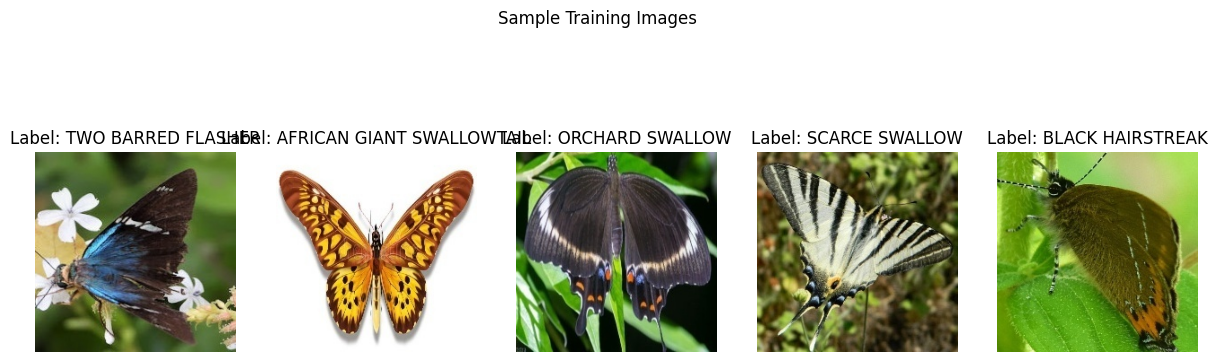

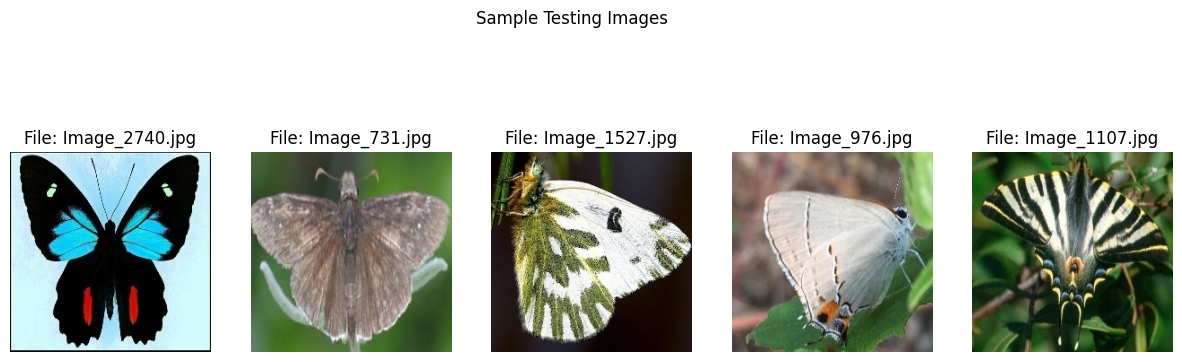

In [12]:
# Function to display images
def display_sample_images(df, folder, title, num_samples=5):
    plt.figure(figsize=(15, 5))
    sample_df = df.sample(num_samples)
    for i, row in enumerate(sample_df.itertuples()):
        img_path = os.path.join(base_path, folder, row.filename)
        img = Image.open(img_path)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(f"Label: {row.label}" if 'label' in df.columns else f"File: {row.filename}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display training images
display_sample_images(train_df, 'train', 'Sample Training Images')

# Display testing images (labels may not be present)
display_sample_images(test_df, 'test', 'Sample Testing Images')

Training Image Size Stats:
        Width  Height
count  6499.0  6499.0
mean    224.0   224.0
std       0.0     0.0
min     224.0   224.0
25%     224.0   224.0
50%     224.0   224.0
75%     224.0   224.0
max     224.0   224.0

Testing Image Size Stats:
        Width  Height
count  2786.0  2786.0
mean    224.0   224.0
std       0.0     0.0
min     224.0   224.0
25%     224.0   224.0
50%     224.0   224.0
75%     224.0   224.0
max     224.0   224.0


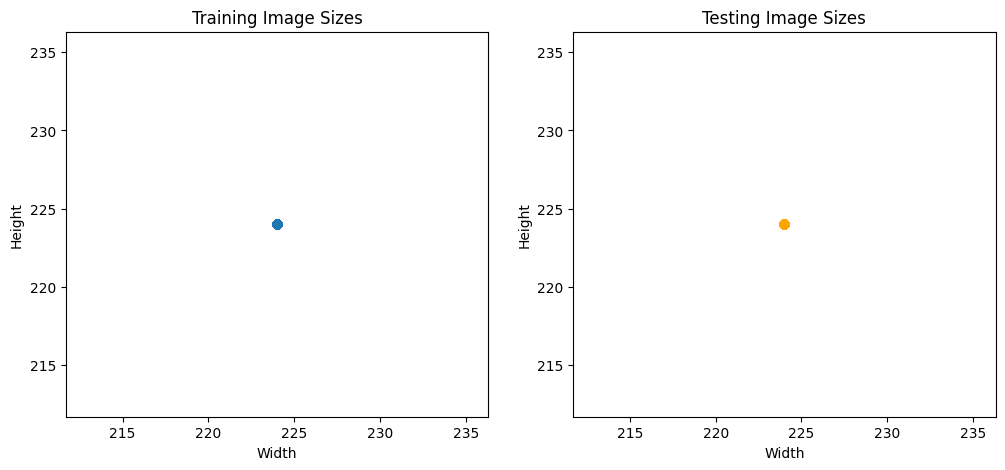

In [13]:
# Function to get image sizes
def get_image_sizes(df, folder):
    sizes = []
    for filename in df['filename']:
        img_path = os.path.join(base_path, folder, filename)
        with Image.open(img_path) as img:
            sizes.append(img.size)  # (width, height)
    return sizes

# Get sizes for training and testing images
train_sizes = get_image_sizes(train_df, 'train')
test_sizes = get_image_sizes(test_df, 'test')

# Convert to DataFrame for analysis
train_size_df = pd.DataFrame(train_sizes, columns=['Width', 'Height'])
test_size_df = pd.DataFrame(test_sizes, columns=['Width', 'Height'])

# Basic statistics
print("Training Image Size Stats:")
print(train_size_df.describe())
print("\nTesting Image Size Stats:")
print(test_size_df.describe())

# Plot size distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(train_size_df['Width'], train_size_df['Height'], alpha=0.5)
plt.title('Training Image Sizes')
plt.xlabel('Width')
plt.ylabel('Height')

plt.subplot(1, 2, 2)
plt.scatter(test_size_df['Width'], test_size_df['Height'], alpha=0.5, color='orange')
plt.title('Testing Image Sizes')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()